In [1]:
import pandas as pd
from deepface import DeepFace

In [2]:
df = pd.read_csv('../../dataset/Labeled Faces in the University Students Dataset/master.csv')
df.head()

,file_x,file_y,Decision
0,1.jpg,2.jpg,No
1,1.jpg,3.jpg,No
2,1.jpg,32.jpg,Yes
3,2.jpg,3.jpg,No
4,2.jpg,33.jpg,Yes


In [3]:
df['file_x'] = '../../dataset/Labeled Faces in the University Students Dataset/' + df['file_x'].astype(str)
df['file_y'] = '../../dataset/Labeled Faces in the University Students Dataset/' + df['file_y'].astype(str)

In [4]:
instances = df[["file_x", "file_y"]].values.tolist()
instances

[['../../dataset/Labeled Faces in the University Students Dataset/1.jpg',
  '../../dataset/Labeled Faces in the University Students Dataset/2.jpg'],
 ['../../dataset/Labeled Faces in the University Students Dataset/1.jpg',
  '../../dataset/Labeled Faces in the University Students Dataset/3.jpg'],
 ['../../dataset/Labeled Faces in the University Students Dataset/1.jpg',
  '../../dataset/Labeled Faces in the University Students Dataset/32.jpg'],
 ['../../dataset/Labeled Faces in the University Students Dataset/2.jpg',
  '../../dataset/Labeled Faces in the University Students Dataset/3.jpg'],
 ['../../dataset/Labeled Faces in the University Students Dataset/2.jpg',
  '../../dataset/Labeled Faces in the University Students Dataset/33.jpg'],
 ['../../dataset/Labeled Faces in the University Students Dataset/2.jpg',
  '../../dataset/Labeled Faces in the University Students Dataset/5.jpg'],
 ['../../dataset/Labeled Faces in the University Students Dataset/3.jpg',
  '../../dataset/Labeled Faces

In [5]:
model_name = "Facenet"
distance_metric = "euclidean"

In [6]:
resp_obj = DeepFace.verify(instances, model_name = model_name, distance_metric = distance_metric)

Verification: 100%|██████████| 44/44 [23:05<00:00, 31.49s/it]


In [7]:
distances = []
for i in range(0, len(instances)):
    distance = round(resp_obj["pair_%s" % (i+1)]["distance"], 4)
    distances.append(distance)

In [8]:
df["distance"] = distances
df.head()

,file_x,file_y,Decision,distance
0,../../dataset/Labeled Faces in the University ...,../../dataset/Labeled Faces in the University ...,No,12.2522
1,../../dataset/Labeled Faces in the University ...,../../dataset/Labeled Faces in the University ...,No,13.9645
2,../../dataset/Labeled Faces in the University ...,../../dataset/Labeled Faces in the University ...,Yes,0.0000
3,../../dataset/Labeled Faces in the University ...,../../dataset/Labeled Faces in the University ...,No,11.2227
4,../../dataset/Labeled Faces in the University ...,../../dataset/Labeled Faces in the University ...,Yes,0.0000


<AxesSubplot:ylabel='Density'>

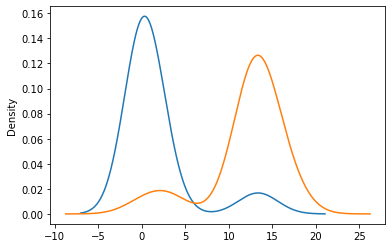

In [9]:
df[df.Decision == "Yes"].distance.plot.kde()
df[df.Decision == "No"].distance.plot.kde()

In [10]:
from chefboost import Chefboost as chef

In [11]:
config = {'algorithm': 'C4.5'}

In [12]:
tmp_df = df[['distance', 'Decision']].rename(columns = {"decision": "Decision"}).copy()
model = chef.fit(tmp_df, config)

[INFO]:  2 CPU cores will be allocated in parallel running
C4.5  tree is going to be built...
-------------------------
finished in  0.49708032608032227  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  88.63636363636364 % on  44  instances
Labels:  ['No' 'Yes']
Confusion matrix:  [[20, 2], [3, 19]]
Precision:  90.9091 %, Recall:  86.9565 %, F1:  88.8889 %


In [28]:
threshold = 7.0838 #comes from c4.5 algorithm

In [29]:
df["prediction"] = "No"

In [30]:
idx = df[df.distance <= threshold].index
df.loc[idx, 'prediction'] = 'Yes'

In [31]:
df.sample(5)

,file_x,file_y,Decision,distance,prediction,p
33,../../dataset/Labeled Faces in the University ...,../../dataset/Labeled Faces in the University ...,No,12.3138,No,No
15,../../dataset/Labeled Faces in the University ...,../../dataset/Labeled Faces in the University ...,Yes,1.8522,Yes,No
26,../../dataset/Labeled Faces in the University ...,../../dataset/Labeled Faces in the University ...,No,3.5812,Yes,No
23,../../dataset/Labeled Faces in the University ...,../../dataset/Labeled Faces in the University ...,No,12.0188,No,No
0,../../dataset/Labeled Faces in the University ...,../../dataset/Labeled Faces in the University ...,No,12.2522,No,No


In [32]:
from sklearn.metrics import confusion_matrix,roc_curve,auc

In [33]:
cm = confusion_matrix(df.Decision.values, df.prediction.values)

In [34]:
tn, fp, fn, tp = cm.ravel()

In [35]:
tn, fp, fn, tp

(20, 3, 2, 19)

In [36]:
recall = tp / (tp + fn)
precision = tp / (tp + fp)
accuracy = (tp + tn)/(tn + fp +  fn + tp)
f1 = 2 * (precision * recall) / (precision + recall)

In [37]:
print("Precision: ", 100*precision,"%")
print("Recall: ", 100*recall,"%")
print("F1 score ",100*f1, "%")
print("Accuracy: ", 100*accuracy,"%")

Precision:  86.36363636363636 %
Recall:  90.47619047619048 %
F1 score  88.37209302325581 %
Accuracy:  88.63636363636364 %


In [41]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
df["p"] = "No"
roc_point=[]

In [43]:
thresholds = list(np.array(list(range(1,100,1)))/1)
for threshold in thresholds:
    idx = df[df.distance <= threshold].index
    df.loc[idx, 'p'] = 'Yes'
    cm = confusion_matrix(df.Decision.values, df.p.values)
    tn, fp, fn, tp = cm.ravel()
    tpr = tp / (tp + fn)
    fpr = tp / (tp + fp)
    roc_point.append([tpr,fpr])
roc_point

[[0.7142857142857143, 0.9375],
 [0.9047619047619048, 0.95],
 [0.9047619047619048, 0.9047619047619048],
 [0.9047619047619048, 0.8636363636363636],
 [0.9047619047619048, 0.8636363636363636],
 [0.9047619047619048, 0.8636363636363636],
 [0.9047619047619048, 0.8636363636363636],
 [0.9047619047619048, 0.8636363636363636],
 [0.9047619047619048, 0.8636363636363636],
 [0.9047619047619048, 0.8636363636363636],
 [0.9047619047619048, 0.8636363636363636],
 [0.9047619047619048, 0.7916666666666666],
 [0.9523809523809523, 0.6451612903225806],
 [0.9523809523809523, 0.5405405405405406],
 [1.0, 0.525],
 [1.0, 0.5],
 [1.0, 0.4883720930232558],
 [1.0, 0.4772727272727273],
 [1.0, 0.4772727272727273],
 [1.0, 0.4772727272727273],
 [1.0, 0.4772727272727273],
 [1.0, 0.4772727272727273],
 [1.0, 0.4772727272727273],
 [1.0, 0.4772727272727273],
 [1.0, 0.4772727272727273],
 [1.0, 0.4772727272727273],
 [1.0, 0.4772727272727273],
 [1.0, 0.4772727272727273],
 [1.0, 0.4772727272727273],
 [1.0, 0.4772727272727273],
 [1.

In [44]:
pivot = pd.DataFrame(roc_point,columns = ['tpr','fpr'])
pivot["threshold"] = thresholds
pivot                    

,tpr,fpr,threshold
0,0.714286,0.937500,1.0
1,0.904762,0.950000,2.0
2,0.904762,0.904762,3.0
3,0.904762,0.863636,4.0
4,0.904762,0.863636,5.0
...,...,...,...
94,1.000000,0.477273,95.0
95,1.000000,0.477273,96.0
96,1.000000,0.477273,97.0
97,1.000000,0.477273,98.0


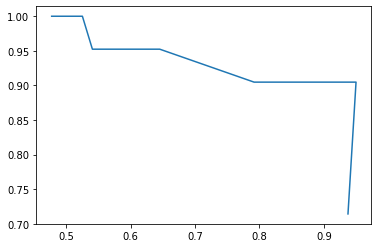

In [45]:
plt.plot(pivot.fpr,pivot.tpr)